<a href="https://colab.research.google.com/github/dmburns1729/Sales-Predictions/blob/main/Project_1_Part_5_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Part 5 (Core)

Data cleanup for machine learning



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [ ]:
# Import the data
path = '/content/sales_predictions (2).csv'
df = pd.read_csv(path)
df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
# make a copy of original data
df_original = df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Check categorical columns for consistancy
# select only object columns
categoricals = df.select_dtypes(include='object')

# check value counts for each object column
for col in categoricals.columns:
  print(col)
  print(categoricals[col].value_counts(), '\n')

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64 

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    55

In [ ]:
Item_Fat_Content_col = {'LF':'Low Fat','reg':'Regular', 'low fat':'Low Fat'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(Item_Fat_Content_col)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# split X and y, you are predicting price
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

# split training and test
# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Loop through index values of the dataframe
for ind in X_train.index:
  
  # Create a filter to select the Item_Identifier corresponding to the index
  item_filter = df['Item_Identifier'] == df.loc[ind, 'Item_Identifier']
  
  # Calculate the rounded value of the mean 'Item_Weight' of this rows 'Item_Identifier'
  mean_item_weight = round(df.loc[item_filter, 'Item_Weight'].mean(),3)

  # Assign mean_item_weight to the 'Item_Weight' column of this row
  df.loc[ind, 'Item_Weight'] = mean_item_weight
 


In [ ]:
print(X_train.Item_Weight.isnull().sum())

2


In [ ]:
# There are only 2 values with missing weight.  I should probably drop them but will 
# Impute values for the skill challenge
# df.dropna(subset=['Item_Weight'], inplace=True)
# print(df.Item_Weight.isnull().sum())

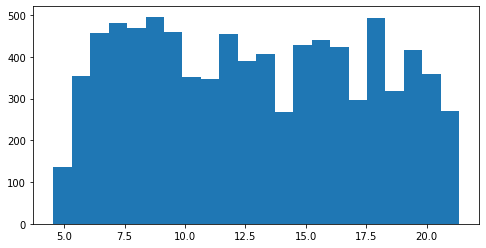

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (8,4));
plt.hist(df['Item_Weight'], bins = 'auto');
# Looks like we got rid of the values at 12.9!  Thanks Yvon.


In [ ]:
# Loop through index values of the dataframe
for ind in X_test.index:
  
  # Create a filter to select the Item_Identifier corresponding to the index
  item_filter = df['Item_Identifier'] == df.loc[ind, 'Item_Identifier']
  
  # Calculate the rounded value of the mean 'Item_Weight' of this rows 'Item_Identifier'
  mean_item_weight = round(df.loc[item_filter, 'Item_Weight'].mean(),3)

  # Assign mean_item_weight to the 'Item_Weight' column of this row
  df.loc[ind, 'Item_Weight'] = mean_item_weight
 


In [ ]:
print(X_test.Item_Weight.isnull().sum())

2


In [ ]:
X_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
7503,FDI28,14.300,Low Fat,0.026300,Frozen Foods,79.4302,OUT013,1987,High,Tier 3,Supermarket Type1
2957,NCM17,7.930,Low Fat,0.071136,Health and Hygiene,42.7086,OUT046,1997,Small,Tier 1,Supermarket Type1
7031,FDC14,14.500,Regular,0.041313,Canned,42.0454,OUT049,1999,Medium,Tier 1,Supermarket Type1
1084,DRC36,13.000,Regular,0.044767,Soft Drinks,173.7054,OUT027,1985,Medium,Tier 3,Supermarket Type3
856,FDS27,10.195,Regular,0.012456,Meat,197.5110,OUT035,2004,Small,Tier 2,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
4753,FDZ38,17.600,Low Fat,0.007994,Dairy,171.6422,OUT013,1987,High,Tier 3,Supermarket Type1
4836,FDM40,10.195,Low Fat,0.000000,Frozen Foods,143.1154,OUT017,2007,NaN,Tier 2,Supermarket Type1
8064,FDG45,8.100,Low Fat,0.128296,Fruits and Vegetables,210.4902,OUT045,2002,NaN,Tier 2,Supermarket Type1
4418,NCZ30,6.590,Low Fat,0.026226,Household,119.0098,OUT049,1999,Medium,Tier 1,Supermarket Type1


In [ ]:
#instantiate the StandardScaler, OneHotEncoder, and Imputers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
# I am using "Missing" as the fill value since I don't want to dirty the data
# for actual values

# Setup the pipelines for the numeric and categorical data

num_pipeline = make_pipeline(mean_imputer, scaler)
nom_pipeline = make_pipeline(freq_imputer, ohe)

# Selectors
num_selector = make_column_selector(dtype_include='number')
nom_selector = make_column_selector(dtype_include='object')

# Setup the tuples to pair the processors with the make column selectors

numeric_tuple = (num_pipeline, num_selector)
nominal_tuple = (nom_pipeline, nom_selector)

# Instantiate the make column transformer
preprocessor = make_column_transformer(numeric_tuple,
                                       nominal_tuple,
                                       remainder='drop') 

# Fit the column transformer on the X_train
preprocessor.fit(X_train)

# Transform the X_train and the X_test

X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_transformed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_transformed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_transformed.dtype)
print('All data in X_test_processed are', X_test_transformed.dtype)
print('\n')
print('shape of data is', X_train_transformed.shape)
print('\n')
X_train_transformed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 1593)




array([[ 0.73647351, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.49910838, -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.1266724 ,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.0062066 , -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.59961942, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.73647351, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
#  Bonus for kicks!  Please don't grade

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
lin_reg = LinearRegression()

lin_reg_pipe = make_pipeline(preprocessor, lin_reg)

lin_reg_pipe.fit(X_train, y_train)

train_predictions = lin_reg_pipe.predict(X_train)
test_predictions = lin_reg_pipe.predict(X_test)
train_error = round(mean_absolute_error(y_train, train_predictions),1)
test_error = round(mean_absolute_error(y_test, test_predictions),1)

print(f'The models average error on the training set is {train_error}')
print(f'The models average error on the testing set is {test_error}')


The models average error on the training set is 736.3
The models average error on the testing set is 776578258520.1


In [ ]:
# Yikes!  Look at that error!!  I must have screwed something up!!